In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import improve_utils as iu

2023-07-30 04:22:40.312134: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
cancer_gen_expr_model = tf.keras.models.load_model("Models//cancer_gen_expr_model")
cancer_gen_mut_model = tf.keras.models.load_model("Models//cancer_gen_mut_model")
cancer_dna_methy_model = tf.keras.models.load_model("Models//cancer_dna_methy_model")
cancer_gen_cnv_model = tf.keras.models.load_model("Models//cancer_gen_cnv_model")

2023-07-30 04:22:45.526193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 04:22:46.564769: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30952 MB memory:  -> device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:86:00.0, compute capability: 7.0


In [3]:
cancer_gen_expr_model.trainable = False
cancer_gen_mut_model.trainable = False
cancer_dna_methy_model.trainable = False
cancer_gen_cnv_model.trainable = False

In [4]:
import pickle

In [5]:
with open("csa_data//drug_features.pickle", "rb") as f:
    dict_features = pickle.load(f)

In [6]:
with open("csa_data//norm_adj_mat.pickle", "rb") as f:
    dict_adj_mat = pickle.load(f)

In [7]:
with open("csa_data//combo_gen_expr_cnv_norm.pickle", "rb") as f:
    combo_gen_expr_cnv_norm = pickle.load( f)

In [8]:
common_achs = list(combo_gen_expr_cnv_norm.keys())

In [9]:
# combo_gen_expr_cnv_norm

In [10]:
import pandas as pd

In [11]:
pubchem_to_drugs_df = pd.read_csv('csa_data/1.Drug_listMon Jun 24 09_00_55 2019.csv')

In [12]:
# pubchem_to_drugs_df

In [13]:
# pubchem_to_drugs_df

In [14]:
pubchem_to_drugs_df = pubchem_to_drugs_df[["drug_id", "PubCHEM"]]

In [15]:
import numpy as np

In [16]:
pubchem_to_drugs_df["PubCHEM"] = [int(val) if str(val).isdigit() else np.nan for val in pubchem_to_drugs_df["PubCHEM"] ]

In [17]:
pubchem_to_drugs_df = pubchem_to_drugs_df.dropna()

In [18]:
pubchem_to_drugs_df["Drug_ID"] = pubchem_to_drugs_df["drug_id"].astype(str)

In [19]:
pubchem_to_drugs_df["Drug_ID"] = ["Drug_" + str(i) for i in pubchem_to_drugs_df["drug_id"].values]

In [20]:
pubchem_to_drugs_df.head()

,drug_id,PubCHEM,Drug_ID
0,1242,9863776.0,Drug_1242
1,179,3385.0,Drug_179
2,86,10172943.0,Drug_86
3,55,9549184.0,Drug_55
4,1001,65110.0,Drug_1001


In [21]:
train_keep = iu.load_single_drug_response_data_v2(source = 'CTRPv2', split_file_name='CTRPv2_split_0_train.txt', y_col_name='auc')[['improve_sample_id', 'improve_chem_id', 'auc']]

Response data: (229333, 14)
Unique cells:  720
Unique drugs:  494


/lustre/work/statgrads/vpiyush2/DeepCDR_TF/improve_utils.py:187: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(improve_globals.y_file_path, sep=sep)


In [22]:
train_keep = train_keep.sample(frac = 0.35)

In [23]:
test_keep = iu.load_single_drug_response_data_v2(source = 'CTRPv2', split_file_name='CTRPv2_split_0_val.txt', y_col_name='auc')[['improve_sample_id', 'improve_chem_id', 'auc']]

Response data: (28666, 14)
Unique cells:  717
Unique drugs:  494


/lustre/work/statgrads/vpiyush2/DeepCDR_TF/improve_utils.py:187: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(improve_globals.y_file_path, sep=sep)


In [24]:
train_keep.head()

,improve_sample_id,improve_chem_id,auc
119029,ACH-000987,Drug_1132,0.9358
69521,ACH-000914,Drug_878,0.8200
105869,ACH-000787,Drug_1285,1.0000
163195,ACH-000347,Drug_1489,0.9904
115286,ACH-000763,Drug_1405,0.8650


In [25]:
train_keep.columns = ["Cell_Line", "Drug_ID", "AUC"]

In [26]:
test_keep.columns = ["Cell_Line", "Drug_ID", "AUC"]

In [27]:
samp_drug = test_keep["Drug_ID"].unique()[-1]

In [28]:
samp_ach = np.array(test_keep["Cell_Line"].unique()[-1])

In [29]:
valid_keep = iu.load_single_drug_response_data_v2(source = 'CTRPv2', split_file_name='CTRPv2_split_0_test.txt', y_col_name='auc')[['improve_sample_id', 'improve_chem_id', 'auc']]

Response data: (28666, 14)
Unique cells:  719
Unique drugs:  494


/lustre/work/statgrads/vpiyush2/DeepCDR_TF/improve_utils.py:187: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(improve_globals.y_file_path, sep=sep)


In [30]:
valid_keep.columns = ["Cell_Line", "Drug_ID", "AUC"]

In [31]:
# train_keep.to_csv("csa_data/dualgcndeepcdr_combo_train.csv", index = False)

In [32]:
# test_keep.to_csv("csa_data/dualgcndeepcdr_combo_test.csv", index = False)

In [33]:
# train_methy = cancer_dna_methy_model.predict(train_keep1["Cell_Line"].values, batch_size = 512)

In [34]:
# train_methy.shape

In [35]:
train_gcn_feats = []
train_adj_list = []
for drug_id in train_keep["Drug_ID"].values:
    train_gcn_feats.append(dict_features[drug_id])
    train_adj_list.append(dict_adj_mat[drug_id])

In [36]:
valid_gcn_feats = []
valid_adj_list = []
for drug_id in test_keep["Drug_ID"].values:
    valid_gcn_feats.append(dict_features[drug_id])
    valid_adj_list.append(dict_adj_mat[drug_id])

In [37]:
train_gcn_feats = np.array(train_gcn_feats).astype("float32")
valid_gcn_feats = np.array(valid_gcn_feats).astype("float32")

In [38]:
valid_gcn_feats.shape

(28666, 223, 75)

In [39]:
train_adj_list = np.array(train_adj_list).astype("float32")
valid_adj_list = np.array(valid_adj_list).astype("float32")

In [40]:
valid_adj_list.shape

(28666, 223, 223)

In [41]:
# combo_gen_expr_cnv_norm

In [42]:
# valid_gcn_feats_omics

In [43]:
train_gcn_feats_omics = []
for cnc_id in train_keep["Cell_Line"].values:
    train_gcn_feats_omics.append(combo_gen_expr_cnv_norm[cnc_id])

In [44]:
train_gcn_feats_omics = np.array(train_gcn_feats_omics).astype("float32")

In [45]:
train_gcn_feats_omics.shape

(80267, 683, 2)

In [46]:
valid_gcn_feats_omics = []
for cnc_id in test_keep["Cell_Line"].values:
    valid_gcn_feats_omics.append(combo_gen_expr_cnv_norm[cnc_id])

In [47]:
valid_gcn_feats_omics = np.array(valid_gcn_feats_omics).astype("float32")

In [48]:
valid_gcn_feats_omics.shape

(28666, 683, 2)

In [49]:
# train_methy = cancer_dna_methy_model(train_keep1["Cell_Line"].values)

In [50]:
# cancer_gen_expr_model(samp_ach).numpy().shape[0]

In [51]:
from tensorflow.keras import backend as K

In [52]:
# cancer_gen_expr_model(train_keep1["Cell_Line"].values[:5])

In [53]:
training = False
dropout1 = 0.20
dropout2 = 0.30

In [54]:
## get the model architecture
def deepcdrgcn(training = training, dropout1 = dropout1, dropout2 = dropout2):
    
    input_gcn_features = tf.keras.layers.Input(shape = (dict_features[samp_drug].shape[0], 75))
    input_norm_adj_mat = tf.keras.layers.Input(shape = (dict_adj_mat[samp_drug].shape[0], dict_adj_mat[samp_drug].shape[0]))
    mult_1 = tf.keras.layers.Dot(1)([input_norm_adj_mat, input_gcn_features])
    dense_layer_gcn = tf.keras.layers.Dense(256, activation = "relu")
    dense_out = dense_layer_gcn(mult_1)
    dense_out = tf.keras.layers.BatchNormalization()(dense_out)
    dense_out = tf.keras.layers.Dropout(dropout1)(dense_out, training = training)
    mult_2 = tf.keras.layers.Dot(1)([input_norm_adj_mat, dense_out])
    dense_layer_gcn = tf.keras.layers.Dense(256, activation = "relu")
    dense_out = dense_layer_gcn(mult_2)
    dense_out = tf.keras.layers.BatchNormalization()(dense_out)
    dense_out = tf.keras.layers.Dropout(dropout1)(dense_out, training = training)

    dense_layer_gcn = tf.keras.layers.Dense(100, activation = "relu")
    mult_3 = tf.keras.layers.Dot(1)([input_norm_adj_mat, dense_out])
    dense_out = dense_layer_gcn(mult_3)
    dense_out = tf.keras.layers.BatchNormalization()(dense_out)
    dense_out = tf.keras.layers.Dropout(dropout1)(dense_out, training = training)

    dense_out = tf.keras.layers.GlobalAvgPool1D()(dense_out)
    
    input_gen_expr = tf.keras.layers.Input(shape = (cancer_gen_expr_model(samp_ach).numpy().shape[0],2))
    
    l1 = tf.keras.layers.Dense(32)(input_gen_expr)
    l1 = tf.keras.layers.Dropout(dropout1)(l1, training = training)
    l2 = tf.keras.layers.Dense(128)(l1)
    l2 = tf.keras.layers.Dropout(dropout1)(l2, training = training)
    
    dense_layer_gcn1 = tf.keras.layers.Dense(256, activation = "relu")
    dense_out1 = dense_layer_gcn1(l2)
    dense_out1 = tf.keras.layers.BatchNormalization()(dense_out1)
    dense_out1 = tf.keras.layers.Dropout(dropout1)(dense_out1, training = training)
# mult_21 = tf.keras.layers.Dot(1)([const_input, dense_out1])
    dense_layer_gcn1 = tf.keras.layers.Dense(256, activation = "relu")
    dense_out1 = dense_layer_gcn1(dense_out1)
    dense_out1 = tf.keras.layers.BatchNormalization()(dense_out1)
    dense_out1 = tf.keras.layers.Dropout(dropout1)(dense_out1, training = training)
    dense_layer_gcn1 = tf.keras.layers.Dense(256, activation = "relu")
    dense_out1 = dense_layer_gcn1(dense_out1)
    dense_out1 = tf.keras.layers.BatchNormalization()(dense_out1)
    dense_out1 = tf.keras.layers.Dropout(dropout1)(dense_out1, training = training)
    dense_layer_gcn1 = tf.keras.layers.Dense(256, activation = "relu")
    dense_out1 = dense_layer_gcn1(dense_out1)
    dense_out1 = tf.keras.layers.BatchNormalization()(dense_out1)
    dense_out1 = tf.keras.layers.Dropout(dropout1)(dense_out1, training = training)
    dense_out1 = tf.keras.layers.GlobalAvgPool1D()(dense_out1)
    
    
    input_gen_methy1 = tf.keras.layers.Input(shape = (1,), dtype = tf.string)
    # cancer_dna_methy_model.trainable
    input_gen_methy = cancer_dna_methy_model(input_gen_methy1)
    input_gen_methy.trainable = False
    gen_methy_layer = tf.keras.layers.Dense(64, activation = "tanh")
    
    gen_methy_emb = gen_methy_layer(input_gen_methy)
    gen_methy_emb = tf.keras.layers.BatchNormalization()(gen_methy_emb)
    gen_methy_emb = tf.keras.layers.Dropout(dropout1)(gen_methy_emb, training = training)
    gen_methy_layer = tf.keras.layers.Dense(64, activation = "relu")
    gen_methy_emb = gen_methy_layer(gen_methy_emb)
    
    
    input_gen_mut1 = tf.keras.layers.Input(shape = (1,), dtype = tf.string)
    input_gen_mut = cancer_gen_mut_model(input_gen_mut1)
    input_gen_mut.trainable = False
    
    reshape_gen_mut = tf.keras.layers.Reshape((1, cancer_gen_mut_model(samp_ach).numpy().shape[0], 1))
    reshape_gen_mut = reshape_gen_mut(input_gen_mut)
    gen_mut_layer = tf.keras.layers.Conv2D(50, (1, 700), strides=5, activation = "tanh")
    gen_mut_emb = gen_mut_layer(reshape_gen_mut)
    pool_layer = tf.keras.layers.MaxPooling2D((1,5))
    pool_out = pool_layer(gen_mut_emb)
    gen_mut_layer = tf.keras.layers.Conv2D(30, (1, 5), strides=2, activation = "relu")
    gen_mut_emb = gen_mut_layer(pool_out)
    pool_layer = tf.keras.layers.MaxPooling2D((1,10))
    pool_out = pool_layer(gen_mut_emb)
    flatten_layer = tf.keras.layers.Flatten()
    flatten_out = flatten_layer(pool_out)
    all_omics = tf.keras.layers.Concatenate()([gen_methy_emb, flatten_out, dense_out1, dense_out])
    x = tf.keras.layers.Dense(300,activation = 'tanh')(all_omics)
    x = tf.keras.layers.Dropout(dropout1)(x, training = training)
    x = tf.keras.layers.Lambda(lambda x: K.expand_dims(x,axis=-1))(x)
    x = tf.keras.layers.Lambda(lambda x: K.expand_dims(x,axis=1))(x)
    x = tf.keras.layers.Conv2D(filters=30, kernel_size=(1,150),strides=(1, 1), activation = 'relu',padding='valid')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(1,2))(x)
    x = tf.keras.layers.Conv2D(filters=10, kernel_size=(1,5),strides=(1, 1), activation = 'relu',padding='valid')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(1,3))(x)
    x = tf.keras.layers.Conv2D(filters=5, kernel_size=(1,5),strides=(1, 1), activation = 'relu',padding='valid')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(1,3))(x)
    x = tf.keras.layers.Dropout(dropout1)(x, training = training)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(dropout2)(x, training = training)
    final_out_layer = tf.keras.layers.Dense(1, activation = "sigmoid")
    final_out = final_out_layer(x)
    simplecdr = tf.keras.models.Model([input_gcn_features, input_norm_adj_mat, input_gen_expr,
                                   input_gen_methy1, input_gen_mut1], final_out)
    simplecdr.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                      # optimizer = tf.keras.optimizers.Adam(lr=1e-3),
                    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
                    metrics = [tf.keras.metrics.RootMeanSquaredError()])
    
    return simplecdr

In [ ]:
check = deepcdrgcn(training = training, dropout1 = dropout1, dropout2 = dropout2)

In [ ]:
check.summary()

In [ ]:
# [layer.name for layer in check.layers]

In [ ]:
plt.hist( train_keep["AUC"].values.reshape(-1,1))
plt.show()

In [ ]:
check.fit([train_gcn_feats, train_adj_list, train_gcn_feats_omics, train_keep["Cell_Line"].values.reshape(-1,1), train_keep["Cell_Line"].values.reshape(-1,1)],
          train_keep["AUC"].values.reshape(-1,1),
         validation_data = ([valid_gcn_feats, valid_adj_list, valid_gcn_feats_omics, test_keep["Cell_Line"].values.reshape(-1,1), test_keep["Cell_Line"].values.reshape(-1,1)],
          test_keep["AUC"].values.reshape(-1,1)), 
         batch_size = 128, epochs = 10000, 
         callbacks = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights=True, 
                                                     mode = "min"), shuffle = True, verbose = 1, 
         validation_batch_size = 128)

In [ ]:
check.save("Models/combo_cdr_gcn_on_ctrpv2_0_drop_on_train_and_pred_sample_035")

In [55]:
check = tf.keras.models.load_model("Models/combo_cdr_gcn_on_ctrpv2_0_drop_on_train_and_pred_sample_035")

In [56]:
def get_features(train_keep1):
    train_gcn_feats = []
    train_adj_list = []
    for drug_id in train_keep1["Drug_ID"].values:
        train_gcn_feats.append(dict_features[drug_id])
        train_adj_list.append(dict_adj_mat[drug_id])
    train_gcn_feats = np.array(train_gcn_feats).astype("float32")
    train_adj_list = np.array(train_adj_list).astype("float32")
    train_gcn_feats_omics = []
    for cnc_id in train_keep1["Cell_Line"].values:
        train_gcn_feats_omics.append(combo_gen_expr_cnv_norm[cnc_id])
    train_gcn_feats_omics = np.array(train_gcn_feats_omics).astype("float32")
    l2, l1 = train_keep1["Cell_Line"].values.reshape(-1,1), train_keep1["Cell_Line"].values.reshape(-1,1)
    y_train = train_keep1["AUC"].values.reshape(-1,1)
    return [[train_gcn_feats, train_adj_list, train_gcn_feats_omics, l2, l1], y_train]

In [57]:
# ccle_all

In [58]:
# ccle_all = iu.load_single_drug_response_data_v2(source = 'CCLE_all', split_file_name='CCLE_all.txt', y_col_name='AUC')[["improve_sample_id", "improve_chem_id", "auc"]]

In [59]:
# ccle_all = ccle_all.dropna()

In [60]:
valid_keep["AUC"].describe()

count    28666.000000
mean         0.863181
std          0.143690
min          0.030800
25%          0.805825
50%          0.908750
75%          0.968100
max          1.000000
Name: AUC, dtype: float64

In [61]:
# ccle_all.shape

In [62]:
# ccle_all_cutoff = np.percentile(ccle_all["ic50"].values, q= (2.5))

In [63]:
# ccle_all = ccle_all[ccle_all["ic50"] >= ccle_all_cutoff]

In [64]:
# ccle_all.shape

In [65]:
# plt.hist(ccle_all["ic50"].values)

In [66]:
# CTRPv2_all = iu.load_single_drug_response_data_v2(source = 'CTRPv2_all', split_file_name='CTRPv2_all.txt', y_col_name='IC50')[["improve_sample_id", "improve_chem_id", "ic50"]]

In [67]:
# CTRPv2_all = CTRPv2_all.dropna()

In [68]:
# CTRPv2_all_cutoff = np.percentile(CTRPv2_all["ic50"].values, q= (2.5))

In [69]:
# CTRPv2_all = CTRPv2_all[CTRPv2_all["ic50"] >= CTRPv2_all_cutoff]

In [70]:
# CTRPv2_all.shape

In [71]:
# plt.hist(CTRPv2_all["ic50"].values)
# plt.show()

In [72]:
# CTRPv2_all = CTRPv2_all.sample(frac = 0.2)

In [73]:
# CTRPv2_all.shape

In [74]:
# gsci_all = iu.load_single_drug_response_data_v2(source = 'gsci_all', split_file_name='gCSI_all.txt', y_col_name='IC50')[["improve_sample_id", "improve_chem_id", "ic50"]]

In [75]:
# gsci_all = gsci_all.dropna()

In [76]:
# gdsc_v1_all = iu.load_single_drug_response_data_v2(source = 'GDSCv1_all', split_file_name='GDSCv1_all.txt', y_col_name='IC50')[["improve_sample_id", "improve_chem_id", "ic50"]]

In [77]:
# gdsc_v1_all = gdsc_v1_all.dropna()

In [78]:
# gdsc_v2_all = iu.load_single_drug_response_data_v2(source = 'GDSCv2_all', split_file_name='GDSCv2_all.txt', y_col_name='IC50')[["improve_sample_id", "improve_chem_id", "ic50"]]

In [79]:
# gdsc_v2_all = gdsc_v2_all.dropna()

In [80]:
# combo_keep1 = pd.concat([train_keep, test_keep], ignore_index = True)

In [81]:
# ccle_all.columns

In [82]:
# CTRPv2_all.columns = combo_keep1.columns

In [83]:
# CTRPv2_all["IC_50"] = CTRPv2_all["IC_50"].astype("float32")

In [84]:
# CTRPv2_all.head()

In [85]:
# ccle_all_right = pd.merge(combo_keep1,CTRPv2_all, how='outer', indicator=True)
# to_pred_ccle = ccle_all_right[ccle_all_right['_merge'] == 'right_only']

In [86]:
valid_keep.head()

,Cell_Line,Drug_ID,AUC
0,ACH-000956,Drug_1499,0.9106
1,ACH-000956,Drug_1373,0.9572
2,ACH-000956,Drug_346,0.9824
3,ACH-000956,Drug_1157,0.8306
4,ACH-000956,Drug_728,0.5877


(array([   55.,   140.,   366.,   851.,  1651.,  2737.,  4648.,  9753.,
        18974., 41092.]),
 array([0.0249 , 0.12241, 0.21992, 0.31743, 0.41494, 0.51245, 0.60996,
        0.70747, 0.80498, 0.90249, 1.     ]),
 <BarContainer object of 10 artists>)

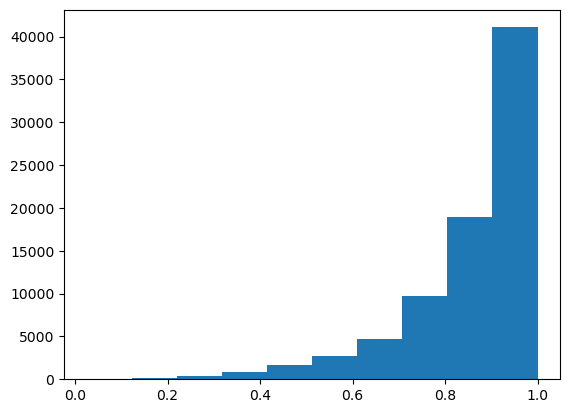

In [87]:
plt.hist(train_keep['AUC'].values)

(array([   25.,    61.,   134.,   292.,   547.,   968.,  1653.,  3498.,
         6630., 14858.]),
 array([0.0308 , 0.12772, 0.22464, 0.32156, 0.41848, 0.5154 , 0.61232,
        0.70924, 0.80616, 0.90308, 1.     ]),
 <BarContainer object of 10 artists>)

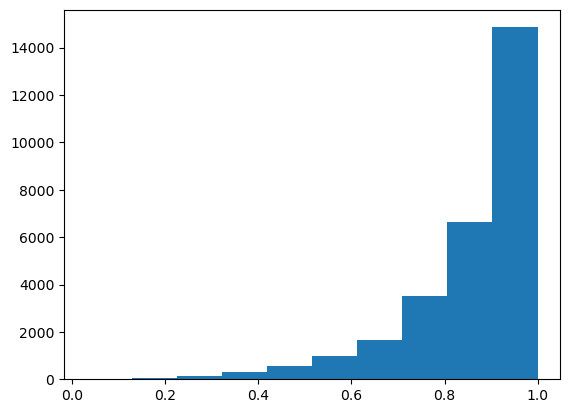

In [88]:
plt.hist(valid_keep['AUC'].values)

In [89]:
features, target = get_features(valid_keep)

In [90]:
# features, target = features.astype("float32"), target.astype("float32")

In [91]:
target.shape

(28666, 1)

In [92]:
features[0].shape

(28666, 223, 75)

In [93]:
preds = check.predict(features, verbose = 1, batch_size = 64)

2023-07-30 04:23:24.635237: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


448/448 [==============================] - 10s 16ms/step


(array([   35.,    75.,   197.,   370.,   637.,   991.,  1758.,  3225.,
         6979., 14399.]),
 array([0.13616136, 0.22202317, 0.307885  , 0.3937468 , 0.4796086 ,
        0.5654704 , 0.6513322 , 0.73719406, 0.82305586, 0.90891767,
        0.99477947], dtype=float32),
 <BarContainer object of 10 artists>)

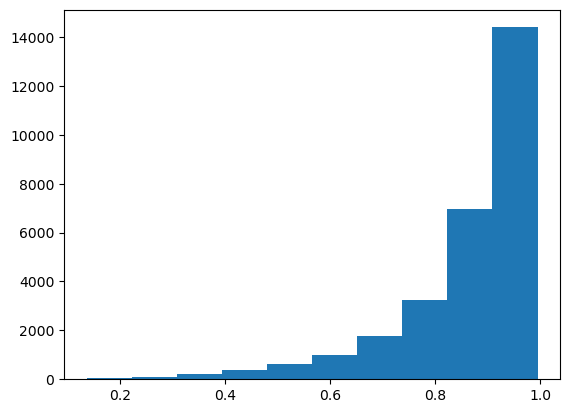

In [94]:
plt.hist(preds)

In [95]:
# check.evaluate(features,target, verbose = 1, batch_size = 64)

In [96]:
# features[0].shape

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
# target

In [99]:
preds.shape

(28666, 1)

In [100]:
np.sqrt(mean_squared_error(preds, target))

0.07012427304237527

In [101]:
from scipy.stats import pearsonr

In [102]:
pearsonr(preds[:,0], target[:,0])

(0.873560763875547, 0.0)

In [103]:
print(pearsonr(preds[:,0], target[:,0]), flush = True)

(0.873560763875547, 0.0)
